In [2]:
import tensorflow as tf

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
tf.__version__

'2.1.0'

In [5]:
#'SpineBaseStatus','SpineMidStatus','NeckStatus','HeadStatus','ShoulderLeftStatus','ElbowLeftStatus','WristLeftStatus','HandLeftStatus','ShoulderRightStatus','ElbowRightStatus','WristRightStatus','HandRightStatus','HipLeftStatus','KneeLeftStatus','AnkleLeftStatus','FootLeftStatus','HipRightStatus','KneeRightStatus','AnkleRightStatus','FootRightStatus','SpineShoulderStatus','HandTipLeftStatus','ThumbLeftStatus','HandTipRightStatus','ThumbRightStatus'

In [6]:
header = ["Index","Time","SkeletonId","HandLeftConfidence","HandLeftState","HandRightConfidence","HandRightState","SpineBase","SpineBaseStatus","SpineBaseLocX","SpineBaseLocY","SpineBaseLocZ","SpineBaseOrW","SpineBaseOrX","SpineBaseOrY","SpineBaseOrZ","SpineMid","SpineMidStatus","SpineMidLocX","SpineMidLocY","SpineMidLocZ","SpineMidOrW","SpineMidOrX","SpineMidOrY","SpineMidOrZ","Neck","NeckStatus","NeckLocX","NeckLocY","NeckLocZ","NeckOrW","NeckOrX","NeckOrY","NeckOrZ","Head","HeadStatus","HeadLocX","HeadLocY","HeadLocZ","HeadOrW","HeadOrX","HeadOrY","HeadOrZ","ShoulderLeft","ShoulderLeftStatus","ShoulderLeftLocX","ShoulderLeftLocY","ShoulderLeftLocZ","ShoulderLeftOrW","ShoulderLeftOrX","ShoulderLeftOrY","ShoulderLeftOrZ","ElbowLeft","ElbowLeftStatus","ElbowLeftLocX","ElbowLeftLocY","ElbowLeftLocZ","ElbowLeftOrW","ElbowLeftOrX","ElbowLeftOrY","ElbowLeftOrZ","WristLeft","WristLeftStatus","WristLeftLocX","WristLeftLocY","WristLeftLocZ","WristLeftOrW","WristLeftOrX","WristLeftOrY","WristLeftOrZ","HandLeft","HandLeftStatus","HandLeftLocX","HandLeftLocY","HandLeftLocZ","HandLeftOrW","HandLeftOrX","HandLeftOrY","HandLeftOrZ","ShoulderRight","ShoulderRightStatus","ShoulderRightLocX","ShoulderRightLocY","ShoulderRightLocZ","ShoulderRightOrW","ShoulderRightOrX","ShoulderRightOrY","ShoulderRightOrZ","ElbowRight","ElbowRightStatus","ElbowRightLocX","ElbowRightLocY","ElbowRightLocZ","ElbowRightOrW","ElbowRightOrX","ElbowRightOrY","ElbowRightOrZ","WristRight","WristRightStatus","WristRightLocX","WristRightLocY","WristRightLocZ","WristRightOrW","WristRightOrX","WristRightOrY","WristRightOrZ","HandRight","HandRightStatus","HandRightLocX","HandRightLocY","HandRightLocZ","HandRightOrW","HandRightOrX","HandRightOrY","HandRightOrZ","HipLeft","HipLeftStatus","HipLeftLocX","HipLeftLocY","HipLeftLocZ","HipLeftOrW","HipLeftOrX","HipLeftOrY","HipLeftOrZ","KneeLeft","KneeLeftStatus","KneeLeftLocX","KneeLeftLocY","KneeLeftLocZ","KneeLeftOrW","KneeLeftOrX","KneeLeftOrY","KneeLeftOrZ","AnkleLeft","AnkleLeftStatus","AnkleLeftLocX","AnkleLeftLocY","AnkleLeftLocZ","AnkleLeftOrW","AnkleLeftOrX","AnkleLeftOrY","AnkleLeftOrZ","FootLeft","FootLeftStatus","FootLeftLocX","FootLeftLocY","FootLeftLocZ","FootLeftOrW","FootLeftOrX","FootLeftOrY","FootLeftOrZ","HipRight","HipRightStatus","HipRightLocX","HipRightLocY","HipRightLocZ","HipRightOrW","HipRightOrX","HipRightOrY","HipRightOrZ","KneeRight","KneeRightStatus","KneeRightLocX","KneeRightLocY","KneeRightLocZ","KneeRightOrW","KneeRightOrX","KneeRightOrY","KneeRightOrZ","AnkleRight","AnkleRightStatus","AnkleRightLocX","AnkleRightLocY","AnkleRightLocZ","AnkleRightOrW","AnkleRightOrX","AnkleRightOrY","AnkleRightOrZ","FootRight","FootRightStatus","FootRightLocX","FootRightLocY","FootRightLocZ","FootRightOrW","FootRightOrX","FootRightOrY","FootRightOrZ","SpineShoulder","SpineShoulderStatus","SpineShoulderLocX","SpineShoulderLocY","SpineShoulderLocZ","SpineShoulderOrW","SpineShoulderOrX","SpineShoulderOrY","SpineShoulderOrZ","HandTipLeft","HandTipLeftStatus","HandTipLeftLocX","HandTipLeftLocY","HandTipLeftLocZ","HandTipLeftOrW","HandTipLeftOrX","HandTipLeftOrY","HandTipLeftOrZ","ThumbLeft","ThumbLeftStatus","ThumbLeftLocX","ThumbLeftLocY","ThumbLeftLocZ","ThumbLeftOrW","ThumbLeftOrX","ThumbLeftOrY","ThumbLeftOrZ","HandTipRight","HandTipRightStatus","HandTipRightLocX","HandTipRightLocY","HandTipRightLocZ","HandTipRightOrW","HandTipRightOrX","HandTipRightOrY","HandTipRightOrZ","ThumbRight","ThumbRightStatus","ThumbRightLocX","ThumbRightLocY","ThumbRightLocZ","ThumbRightOrW","ThumbRightOrX","ThumbRightOrY","ThumbRightOrZ"]

cols = dict()
for i in range(len(header)) :
    cols[i] = header[i]
    
# confidence
for i in range(2,7) :
    del cols[i]
    
# joint name
for i in range(7,224,9) :
    del cols[i]
    
# 8 lower joints
for i in [116, 125, 134, 143, 152, 161, 170, 179] :
    for j in range(8) :
        del cols[i+j]
        
# always null orientations
for i in [39, 201, 210, 219, 228] :
    for j in range(4) :
        del cols[i+j]
        
len(cols)

118

In [7]:
#header = ["Index","Time","SkeletonId","HandLeftConfidence","HandLeftState","HandRightConfidence","HandRightState","SpineBase","SpineBaseLocX","SpineBaseLocY","SpineBaseLocZ","SpineBaseOrW","SpineBaseOrX","SpineBaseOrY","SpineBaseOrZ","SpineMid","SpineMidLocX","SpineMidLocY","SpineMidLocZ","SpineMidOrW","SpineMidOrX","SpineMidOrY","SpineMidOrZ","Neck","NeckLocX","NeckLocY","NeckLocZ","NeckOrW","NeckOrX","NeckOrY","NeckOrZ","Head","HeadLocX","HeadLocY","HeadLocZ","HeadOrW","HeadOrX","HeadOrY","HeadOrZ","ShoulderLeft","ShoulderLeftLocX","ShoulderLeftLocY","ShoulderLeftLocZ","ShoulderLeftOrW","ShoulderLeftOrX","ShoulderLeftOrY","ShoulderLeftOrZ","ElbowLeft","ElbowLeftLocX","ElbowLeftLocY","ElbowLeftLocZ","ElbowLeftOrW","ElbowLeftOrX","ElbowLeftOrY","ElbowLeftOrZ","WristLeft","WristLeftLocX","WristLeftLocY","WristLeftLocZ","WristLeftOrW","WristLeftOrX","WristLeftOrY","WristLeftOrZ","HandLeft","HandLeftLocX","HandLeftLocY","HandLeftLocZ","HandLeftOrW","HandLeftOrX","HandLeftOrY","HandLeftOrZ","ShoulderRight","ShoulderRightLocX","ShoulderRightLocY","ShoulderRightLocZ","ShoulderRightOrW","ShoulderRightOrX","ShoulderRightOrY","ShoulderRightOrZ","ElbowRight","ElbowRightLocX","ElbowRightLocY","ElbowRightLocZ","ElbowRightOrW","ElbowRightOrX","ElbowRightOrY","ElbowRightOrZ","WristRight","WristRightLocX","WristRightLocY","WristRightLocZ","WristRightOrW","WristRightOrX","WristRightOrY","WristRightOrZ","HandRight","HandRightLocX","HandRightLocY","HandRightLocZ","HandRightOrW","HandRightOrX","HandRightOrY","HandRightOrZ","HipLeft","HipLeftLocX","HipLeftLocY","HipLeftLocZ","HipLeftOrW","HipLeftOrX","HipLeftOrY","HipLeftOrZ","KneeLeft","KneeLeftLocX","KneeLeftLocY","KneeLeftLocZ","KneeLeftOrW","KneeLeftOrX","KneeLeftOrY","KneeLeftOrZ","AnkleLeft","AnkleLeftLocX","AnkleLeftLocY","AnkleLeftLocZ","AnkleLeftOrW","AnkleLeftOrX","AnkleLeftOrY","AnkleLeftOrZ","FootLeft","FootLeftLocX","FootLeftLocY","FootLeftLocZ","FootLeftOrW","FootLeftOrX","FootLeftOrY","FootLeftOrZ","HipRight","HipRightLocX","HipRightLocY","HipRightLocZ","HipRightOrW","HipRightOrX","HipRightOrY","HipRightOrZ","KneeRight","KneeRightLocX","KneeRightLocY","KneeRightLocZ","KneeRightOrW","KneeRightOrX","KneeRightOrY","KneeRightOrZ","AnkleRight","AnkleRightLocX","AnkleRightLocY","AnkleRightLocZ","AnkleRightOrW","AnkleRightOrX","AnkleRightOrY","AnkleRightOrZ","FootRight","FootRightLocX","FootRightLocY","FootRightLocZ","FootRightOrW","FootRightOrX","FootRightOrY","FootRightOrZ","SpineShoulder","SpineShoulderLocX","SpineShoulderLocY","SpineShoulderLocZ","SpineShoulderOrW","SpineShoulderOrX","SpineShoulderOrY","SpineShoulderOrZ","HandTipLeft","HandTipLeftLocX","HandTipLeftLocY","HandTipLeftLocZ","HandTipLeftOrW","HandTipLeftOrX","HandTipLeftOrY","HandTipLeftOrZ","ThumbLeft","ThumbLeftLocX","ThumbLeftLocY","ThumbLeftLocZ","ThumbLeftOrW","ThumbLeftOrX","ThumbLeftOrY","ThumbLeftOrZ","HandTipRight","HandTipRightLocX","HandTipRightLocY","HandTipRightLocZ","HandTipRightOrW","HandTipRightOrX","HandTipRightOrY","HandTipRightOrZ","ThumbRight","ThumbRightLocX","ThumbRightLocY","ThumbRightLocZ","ThumbRightOrW","ThumbRightOrX","ThumbRightOrY","ThumbRightOrZ"]


In [8]:
def load_eggnog_skeleton(filepath):
    filepath = "datasets/eggnog/" + filepath
    dataframe = pd.read_csv(filepath, header=None, skiprows=[0], usecols=list(cols.keys()), names=list(cols.values()))
    return dataframe

In [9]:
eggn1 = load_eggnog_skeleton("s01/part1_layout_p02/20151105_191251_00_Skeleton.txt")

In [10]:
eggn1=eggn1.drop(['SpineBaseStatus','SpineMidStatus','NeckStatus','HeadStatus','ShoulderLeftStatus','ElbowLeftStatus','WristLeftStatus','HandLeftStatus','ShoulderRightStatus','ElbowRightStatus','WristRightStatus','HandRightStatus','SpineShoulderStatus','HandTipLeftStatus','ThumbLeftStatus','HandTipRightStatus','ThumbRightStatus'], axis=1)

In [11]:
dataset = eggn1.values

In [12]:
eggn1

,Index,Time,SpineBaseLocX,SpineBaseLocY,SpineBaseLocZ,SpineBaseOrW,SpineBaseOrX,SpineBaseOrY,SpineBaseOrZ,SpineMidLocX,...,HandTipLeftLocZ,ThumbLeftLocX,ThumbLeftLocY,ThumbLeftLocZ,HandTipRightLocX,HandTipRightLocY,HandTipRightLocZ,ThumbRightLocX,ThumbRightLocY,ThumbRightLocZ
0,0,268528,0.003244,-0.154969,2.123980,0.130856,-0.026669,0.990814,0.021304,-0.013620,...,1.917817,0.018979,-0.093995,1.927484,0.079149,-0.104327,1.911678,0.084991,-0.026245,1.911890
1,1,599215,0.003367,-0.154912,2.124035,0.130436,-0.026785,0.990871,0.021072,-0.013537,...,1.927355,0.031237,-0.095832,1.916214,0.074514,-0.102982,1.912341,0.084916,-0.024465,1.914459
2,2,938357,0.003482,-0.154837,2.124029,0.129546,-0.026756,0.990994,0.020812,-0.013372,...,1.923634,0.030036,-0.100875,1.928158,0.075596,-0.104127,1.913285,0.084837,-0.026459,1.911928
3,3,1268540,0.004006,-0.154793,2.124232,0.129309,-0.027097,0.991028,0.020190,-0.012989,...,1.923634,0.025475,-0.096799,1.924643,0.077716,-0.105272,1.912861,0.084404,-0.027450,1.911473
4,4,1599181,0.004727,-0.154687,2.124572,0.129355,-0.027757,0.991018,0.019487,-0.012587,...,1.927221,0.034926,-0.097456,1.915226,0.077618,-0.105052,1.913540,0.084541,-0.026982,1.911907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11794,11794,4632935734,-0.025846,-0.139437,1.858503,0.044060,-0.035656,0.998370,-0.006756,-0.044548,...,1.661294,-0.054157,-0.049623,1.701136,-0.014369,0.033504,1.622428,0.016313,0.083015,1.625997
11795,11795,4633265867,-0.025781,-0.139493,1.858589,0.044233,-0.035482,0.998366,-0.007115,-0.044379,...,1.655631,-0.052488,-0.049045,1.703013,-0.008678,0.041261,1.623710,0.020514,0.077196,1.617203
11796,11796,4633596552,-0.025688,-0.139604,1.858650,0.044365,-0.035099,0.998370,-0.007543,-0.044064,...,1.676998,-0.057201,-0.053737,1.704430,-0.014777,0.042747,1.625858,0.017864,0.078070,1.617484
11797,11797,4633935706,-0.025646,-0.139743,1.858775,0.044221,-0.034879,0.998382,-0.007868,-0.043898,...,1.677456,-0.059727,-0.053606,1.705910,-0.018063,0.047123,1.628143,0.016692,0.080357,1.620121


In [13]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [14]:
TRAIN_SPLIT = 10000
BUFFER_SIZE = 10000
BATCH_SIZE = 256
EPOCHS=10
EVALUATION_INTERVAL = 200

In [15]:
past_history = 10
future_target = 0
STEP = 1

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)

x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [16]:
print ('Single window of past history : {}'.format(x_train_single[0].shape))

Single window of past history : (10, 101)


In [17]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [21]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(x_train_single.shape[2],
                                           input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1, activation=tf.nn.softmax))
single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [22]:
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)

Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 8s 38ms/step - loss: 1982899601.5979 - val_loss: 4281676170.2400
Epoch 2/10
200/200 [==============================] - 5s 25ms/step - loss: 1978195748.6914 - val_loss: 4281676170.2400
Epoch 3/10
200/200 [==============================] - 5s 26ms/step - loss: 1965490711.3052 - val_loss: 4281676170.2400
Epoch 4/10
200/200 [==============================] - 5s 27ms/step - loss: 1985786910.3420 - val_loss: 4281676170.2400
Epoch 5/10
200/200 [==============================] - 5s 25ms/step - loss: 1971921479.0841 - val_loss: 4281676170.2400
Epoch 6/10
200/200 [==============================] - 5s 25ms/step - loss: 1971045331.1300 - val_loss: 4281676170.2400
Epoch 7/10
200/200 [==============================] - 5s 25ms/step - loss: 1976641270.1387 - val_loss: 4281676170.2400
Epoch 8/10
200/200 [==============================] - 5s 25ms/step - loss: 1967838216.0744 - val_loss: 4281676170.2400
Epoch

In [160]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

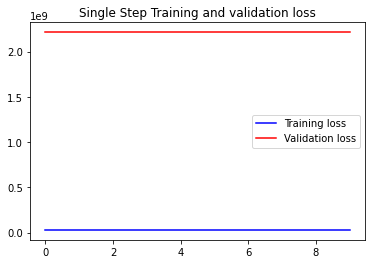

In [161]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

In [194]:
dataset[:, 1]

array([2.68528000e+05, 5.99215000e+05, 9.38357000e+05, ...,
       4.63359655e+09, 4.63393571e+09, 4.63426588e+09])

In [209]:
dataset.shape

(11799, 101)

In [210]:
x_val_single.shape

(1789, 10, 101)

In [211]:
x_train_single.shape

(9990, 10, 101)

In [203]:
len(dataset)

11799

In [218]:
from sklearn.model_selection import train_test_split

In [219]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)

NameError: name 'X' is not defined

In [221]:
dataset.shape

(11799, 101)